# Project 1 - Weather Temperature Trends: Campinas x Global Overall

The project below shows a comparison between the city of Campinas (Brazil) and global average temperatures. For this project some tools were used: Udacity's SQL Workspace, Excel, Python and Jupyter notebooks.

The datasets of Campinas (nearest city to São Paulo) and the global average temperatures were extracted from Udacity's SQL Workspace. The queries used to extract the datasets were:

    SELECT * FROM city_data WHERE city = 'Campinas'
    SELECT * FROM global_data

The queries runned without errors and the intended data was extracted. After that, data was downloaded as csv files, uploaded in a jupyter notebook and an analysis through python codes was made, as seen below.

The rolling function was researched in (https://pandas.pydata.org/), in order to complete the project.

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Listing files in the folder to verify names

! ls './'

Weather-trends-campinas.ipynb
campinas_avg_temp.csv
global_avg_temp.csv


In [3]:
# Opening csv files

campinas = pd.read_csv('campinas_avg_temp.csv', sep=',')
world = pd.read_csv('global_avg_temp.csv', sep=',')
#campinas.head()
world.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
# Verifying data range and basic statistics
print(campinas.describe(), "\n")
print(world.describe())

              year    avg_temp
count   182.000000  175.000000
mean   1922.500000   19.700057
std      52.683014    0.593897
min    1832.000000   18.280000
25%    1877.250000   19.245000
50%    1922.500000   19.700000
75%    1967.750000   20.090000
max    2013.000000   21.300000 

              year    avg_temp
count   266.000000  266.000000
mean   1882.500000    8.369474
std      76.931788    0.584747
min    1750.000000    5.780000
25%    1816.250000    8.082500
50%    1882.500000    8.375000
75%    1948.750000    8.707500
max    2015.000000    9.830000


Analysing the statistics above, it is possible to verify that data from Campinas and global overall don't start and finish in the same year. To perform a correct analysis year by year it will be standarized the range from 1832 to 2013.

The project instructions doesn't specify if the temperature measurements were in Celsius, Farenheit or any other unit of measurement. Running a quick research, through [Climate-Data database] (https://bit.ly/2AeTfqr), the mean average temperature of Campinas (19.3°C) is next to the measurements from the database (19.7). For this reason, the measurment unit of temperature from this project will be considered as celsius.

It is also noticeable that the mean temperature value of global overall (8.36 °C) is lower than the mean in Campinas (19.70 °C).

It isn't really clear on how the global overall temperature values were calculated, but just analysing the samples from Campinas 
(91 years) and the global samples (133 years), maybe the global overall mean temperature was lower because the quantity of samples from countries with cold climates were provided in a greater amount. To reach a precise conclusion it is necessary further analisys in the entire database. 

In [5]:
# Getting the same range of years from global overall and adding to Campinas's dataframe

new = pd.DataFrame(world[82:264].copy())
new = new.reset_index(drop=True)
campinas['world_avg_temp'] = new['avg_temp']
campinas

,year,city,country,avg_temp,world_avg_temp
0,1832,Campinas,Brazil,18.94,7.45
1,1833,Campinas,Brazil,19.93,8.01
2,1834,Campinas,Brazil,19.21,8.15
3,1835,Campinas,Brazil,18.62,7.39
4,1836,Campinas,Brazil,18.84,7.70
...,...,...,...,...,...
177,2009,Campinas,Brazil,20.78,9.51
178,2010,Campinas,Brazil,20.72,9.70
179,2011,Campinas,Brazil,20.33,9.52
180,2012,Campinas,Brazil,21.02,9.51


In [6]:
# Verifying null values

campinas.isnull().any()

year              False
city              False
country           False
avg_temp           True
world_avg_temp    False
dtype: bool

In [7]:
# Checking the sum of missing values

campinas.isnull().sum(axis=0)

year              0
city              0
country           0
avg_temp          7
world_avg_temp    0
dtype: int64

As we only have 7 NaN, it will be used the mean to fill missing values

In [9]:
# Filling missing values with the mean

campinas.fillna(campinas.mean(), inplace=True)
campinas.isnull().any() # Checking if the missing values are gone

year              False
city              False
country           False
avg_temp          False
world_avg_temp    False
dtype: bool

In [10]:
campinas.head()

,year,city,country,avg_temp,world_avg_temp
0,1832,Campinas,Brazil,18.94,7.45
1,1833,Campinas,Brazil,19.93,8.01
2,1834,Campinas,Brazil,19.21,8.15
3,1835,Campinas,Brazil,18.62,7.39
4,1836,Campinas,Brazil,18.84,7.70


In [11]:
# Creating moving average column with a 7-day moving average (7-day-MA), using the rolling function

campinas['7-Day-MA_local'] = campinas['avg_temp'].rolling(window=7).mean()
campinas['7-Day-MA_global'] = campinas['world_avg_temp'].rolling(window=7).mean()
campinas.head(10)

,year,city,country,avg_temp,world_avg_temp,7-Day-MA_local,7-Day-MA_global
0,1832,Campinas,Brazil,18.94,7.45,NaN,NaN
1,1833,Campinas,Brazil,19.93,8.01,NaN,NaN
2,1834,Campinas,Brazil,19.21,8.15,NaN,NaN
3,1835,Campinas,Brazil,18.62,7.39,NaN,NaN
4,1836,Campinas,Brazil,18.84,7.70,NaN,NaN
5,1837,Campinas,Brazil,18.28,7.38,NaN,NaN
6,1838,Campinas,Brazil,18.72,7.51,18.934286,7.655714
7,1839,Campinas,Brazil,18.52,7.63,18.874286,7.681429
8,1840,Campinas,Brazil,19.20,7.80,18.770000,7.651429
9,1841,Campinas,Brazil,18.89,7.69,18.724286,7.585714


# Plotting the results

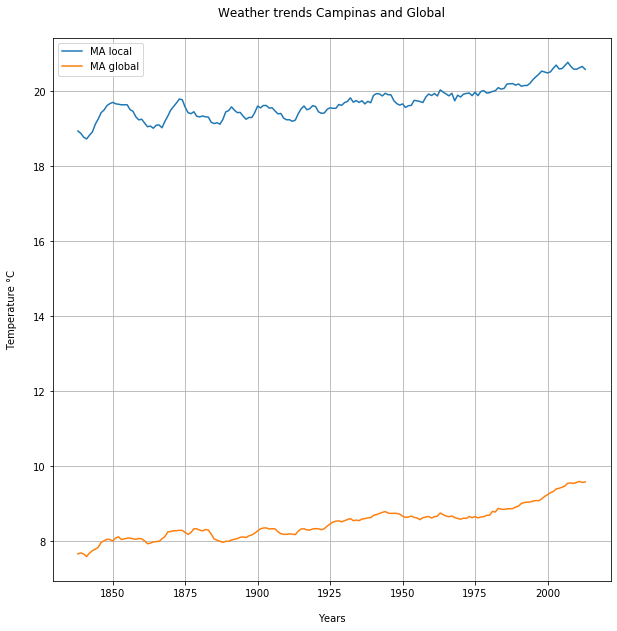

In [12]:
# Plotting a line graph with titles, grid line and legend

plt.figure(figsize=[10,10])
plt.grid(True)
plt.xlabel("\nYears")
plt.ylabel("Temperature °C\n")
plt.title("Weather trends Campinas and Global\n")
plt.plot(campinas['year'], campinas['7-Day-MA_local'], label="MA local")
plt.plot(campinas['year'], campinas['7-Day-MA_global'], label="MA global")
plt.legend(loc=2)

## Final analisys

Analysing the line graph, it is possible to observe that the local and global average temperature increased about 2°C in almost 100 years. 

It is possible to verify a rapid increase in temperature after 1975, possibly due to the increased emission of harmful gases to the atmosphere.

The behaviour of the curves are similar (but not equal) and shows that the temperatures follow the same trend.

The moving average temperature of Campinas has some fluctuations, which could have occurred for many reasons like imprecise meassurement or lack of data in some season of the year, for example. To reach a precise conclusion it is necessary further analisys in how and when the data was extracted and measured. 